<a href="https://colab.research.google.com/github/ricoprediansyah/CV-YOLOv9-PALM_TREES-FULL_VERSION./blob/main/YOLOV9_(Gelan_c%2Ce%2C_Yolov9_c%2Ce)_PALM_TREES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SETUP

In [ ]:
!nvidia-smi

Thu Oct 24 09:16:07 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Total 325 (delta 0), reused 0 (delta 0), pack-reused 325 (from 1)
Receiving objects: 100% (325/325), 2.25 MiB | 4.81 MiB/s, done.
Resolving deltas: 100% (162/162), done.
/content/yolov9
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.8 MB/s eta 0:00:00


In [ ]:
!pip install -q roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.8 MB/s eta 0:00:00


In [ ]:
!pip install -U ultralytics albumentations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 877.1/877.1 kB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.3/225.3 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.4/291.4 kB 14.6 MB/s eta 0:00:00
  Attempting uninstall: albucore
    Found existing installation: albucore 0.0.16
    Uninstalling albucore-0.0.16:
      Successfully uninstalled albucore-0.0.16
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.4.15
    Uninstalling albumentations-1.4.15:
      Successfully uninstalled albumentations-1.4.15


In [ ]:
pip install --upgrade Pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 37.3 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: pillow 10.4.0
    Uninstalling pillow-10.4.0:
      Successfully uninstalled pillow-10.4.0


In [ ]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt
!ls -la {HOME}/weights

total 402448
drwxr-xr-x 2 root root      4096 Oct 24 09:16 .
drwxr-xr-x 1 root root      4096 Oct 24 09:16 ..
-rw-r--r-- 1 root root  51508261 Feb 18  2024 gelan-c.pt
-rw-r--r-- 1 root root 117203713 Feb 18  2024 gelan-e.pt
-rw-r--r-- 1 root root 103153312 Feb 18  2024 yolov9-c.pt
-rw-r--r-- 1 root root 140217688 Feb 18  2024 yolov9-e.pt


In [ ]:
!wget -P {HOME}/data -q https://media.roboflow.com/notebooks/examples/dog.jpeg

In [ ]:
SOURCE_IMAGE_PATH = f"{HOME}/dog.jpeg"

In [ ]:
!python detect.py --weights {HOME}/weights/gelan-c.pt --conf 0.1 --source {HOME}/data/dog.jpeg --device 0

detect: weights=['/content/weights/gelan-c.pt'], source=/content/data/dog.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

/content/yolov9/models/experimental.py:75: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only`

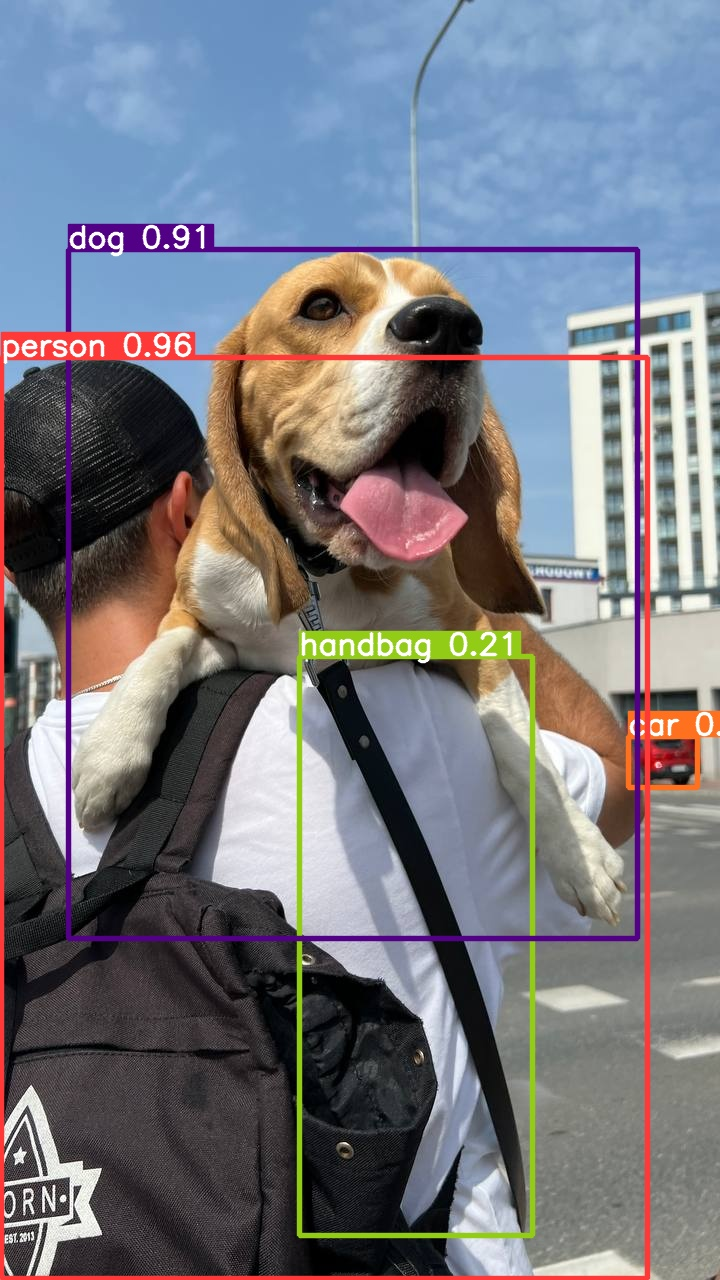

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/detect/exp/dog.jpeg", width=600)

In [ ]:
!python detect.py --weights {HOME}/weights/yolov9-e.pt --conf 0.1 --source {HOME}/data/dog.jpeg --device 0

detect: weights=['/content/weights/yolov9-e.pt'], source=/content/data/dog.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

/content/yolov9/models/experimental.py:75: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only

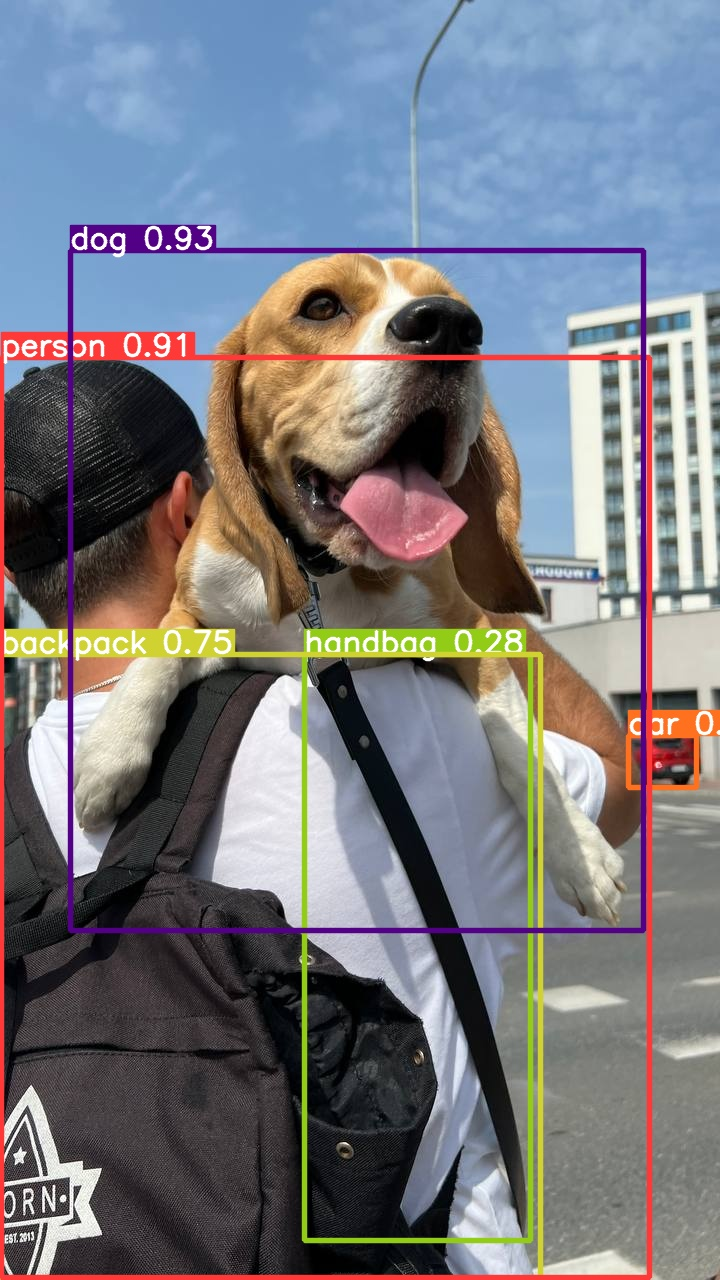

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/detect/exp2/dog.jpeg", width=600)

# IMPORT

In [ ]:
%cd {HOME}/yolov9

/content/yolov9


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="PZMfN1gExhcqfGkkkd43")
project = rf.workspace("cryospace-yylkk").project("palm-tree-label-200m-splitted")
version = project.version(5)
dataset = version.download("yolov9")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Palm-Tree-Label-200m-Splitted-5 in yolov9:: 100%|██████████| 2184/2184 [00:00<00:00, 3318.84it/s]


# TRAIN

###GELAN c - mAP : 98.3%

In [ ]:
%cd {HOME}/yolov9

!python train.py \
--batch 8 --epochs 10 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data {dataset.location}/data.yaml \
--weights {HOME}/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

/content/yolov9
2024-10-24 09:25:06.274134: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-24 09:25:06.293890: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-24 09:25:06.299808: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-24 09:25:06.315575: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-24 09:25:07.516074: W

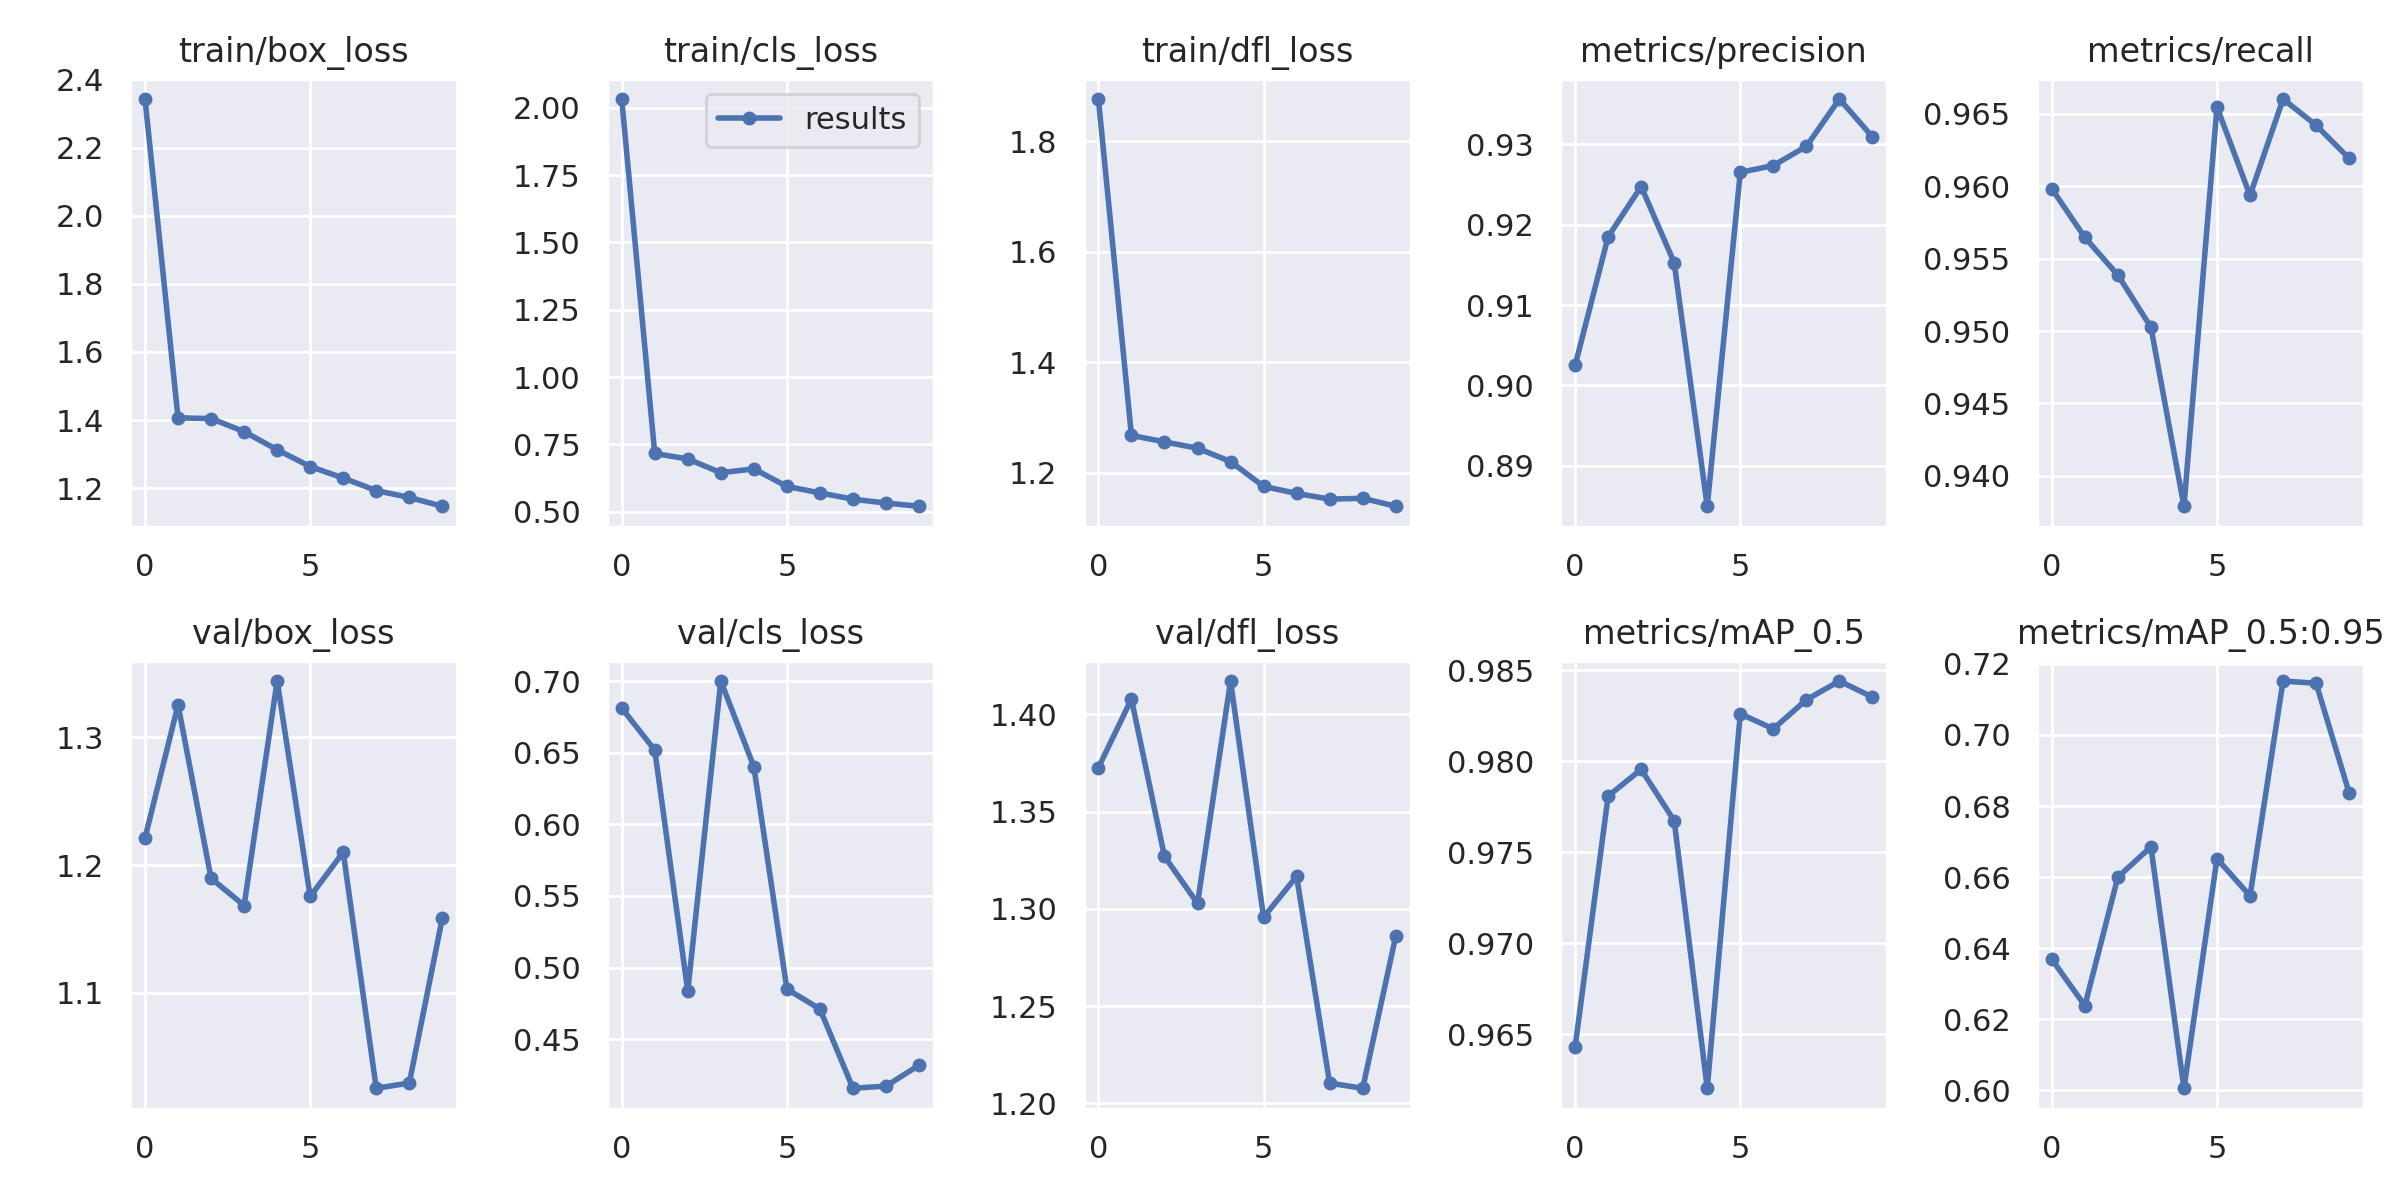

In [ ]:
from IPython.display import Image, display

image_path = '/content/yolov9/runs/train/exp3/results.png'
display(Image(filename=image_path))


### GELAN e - mAP : 96%

In [ ]:
%cd {HOME}/yolov9

!python train.py \
--batch 8 --epochs 10 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data {dataset.location}/data.yaml \
--weights {HOME}/weights/gelan-e.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

/content/yolov9
2024-10-24 09:36:43.273447: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-24 09:36:43.293204: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-24 09:36:43.299154: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-24 09:36:43.313514: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-24 09:36:44.539323: W

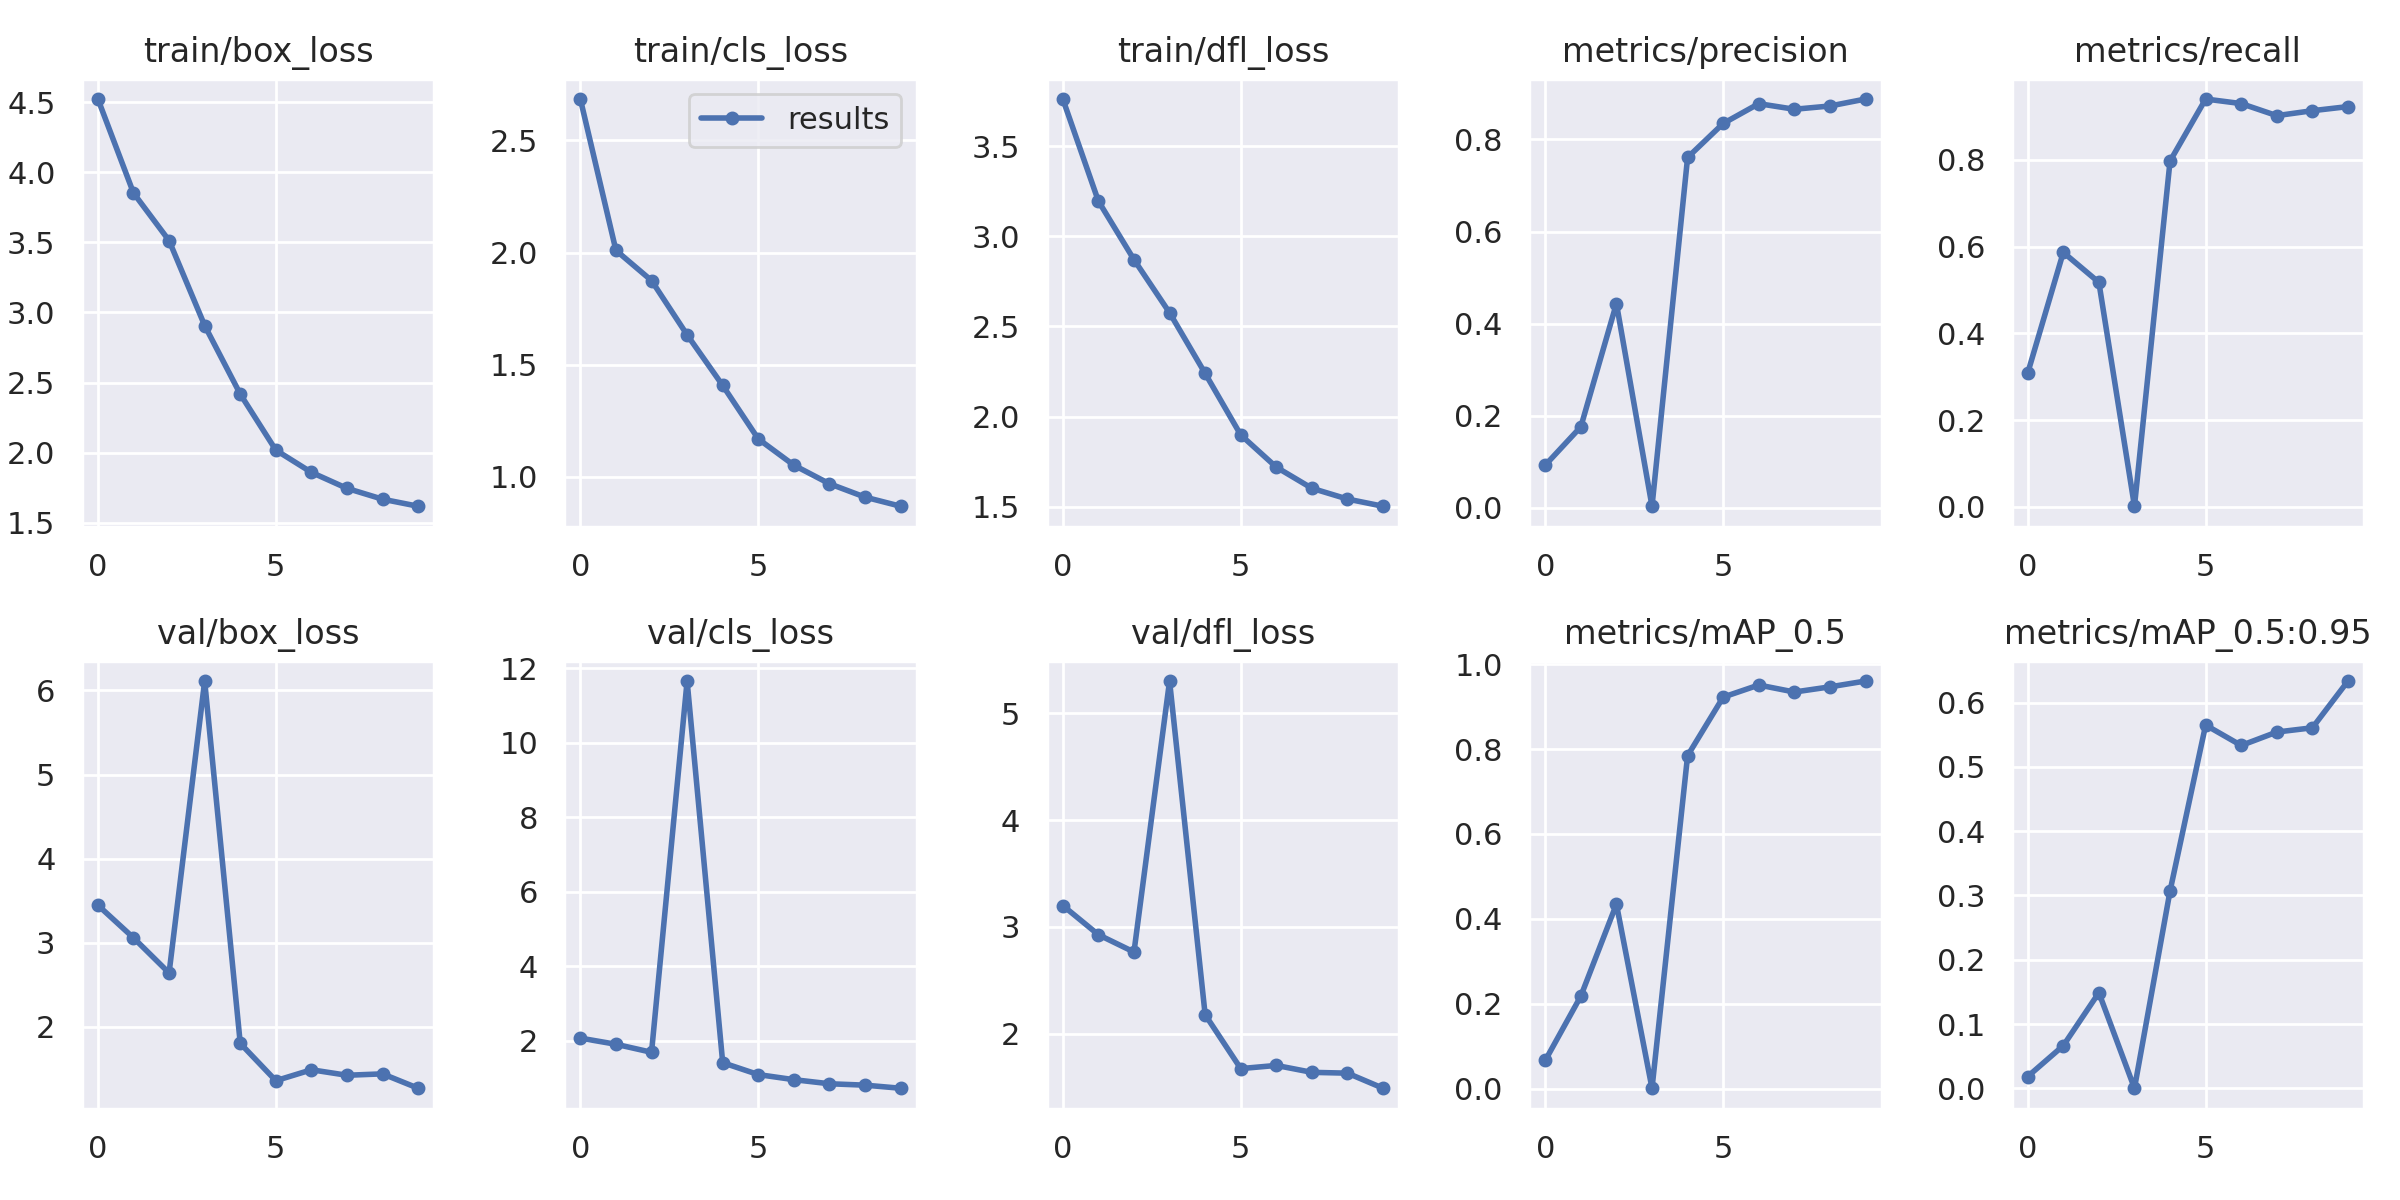

In [ ]:
image_path = '/content/yolov9/runs/train/exp4/results.png'
display(Image(filename=image_path))

### YOLO 9 c - mAP : 95.8%

In [ ]:
%cd {HOME}/yolov9

!python train.py \
--batch 8 --epochs 10 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data {dataset.location}/data.yaml \
--weights {HOME}/weights/yolov9-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

/content/yolov9
2024-10-24 09:53:01.097672: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-24 09:53:01.134580: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-24 09:53:01.144631: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-24 09:53:01.167249: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-24 09:53:02.700646: W

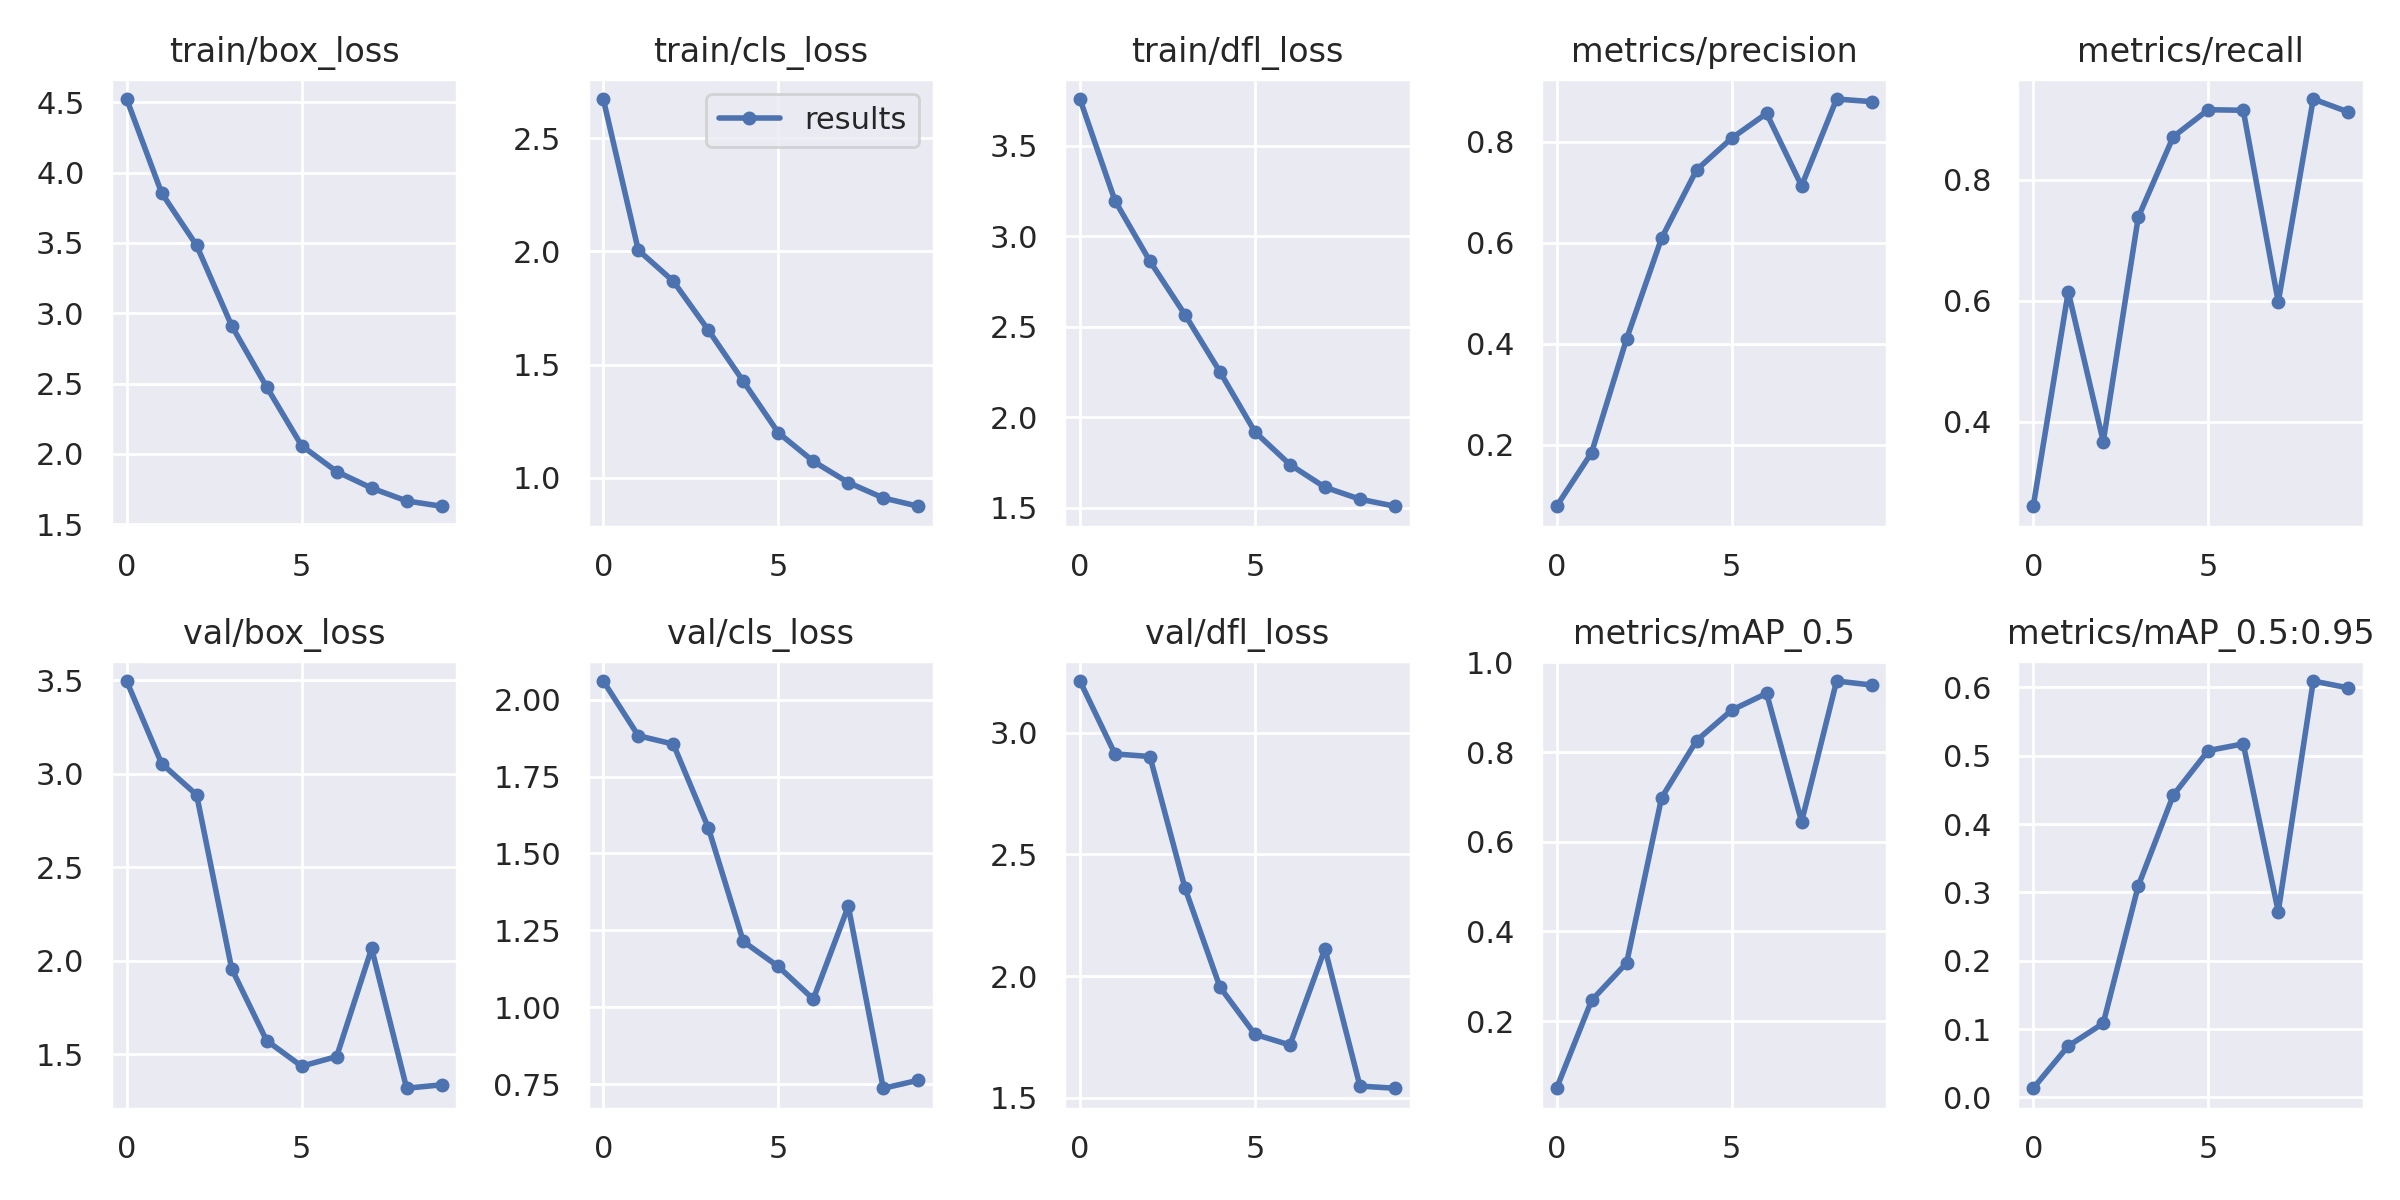

In [ ]:
image_path = '/content/yolov9/runs/train/exp6/results.png'
display(Image(filename=image_path))

### YOLO 9 e - mAP : 95.4%

In [ ]:
%cd {HOME}/yolov9

!python train.py \
--batch 8 --epochs 10 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data {dataset.location}/data.yaml \
--weights {HOME}/weights/yolov9-e.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

/content/yolov9
2024-10-24 10:04:37.754872: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-24 10:04:37.774362: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-24 10:04:37.780350: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-24 10:04:37.794643: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-24 10:04:39.115404: W

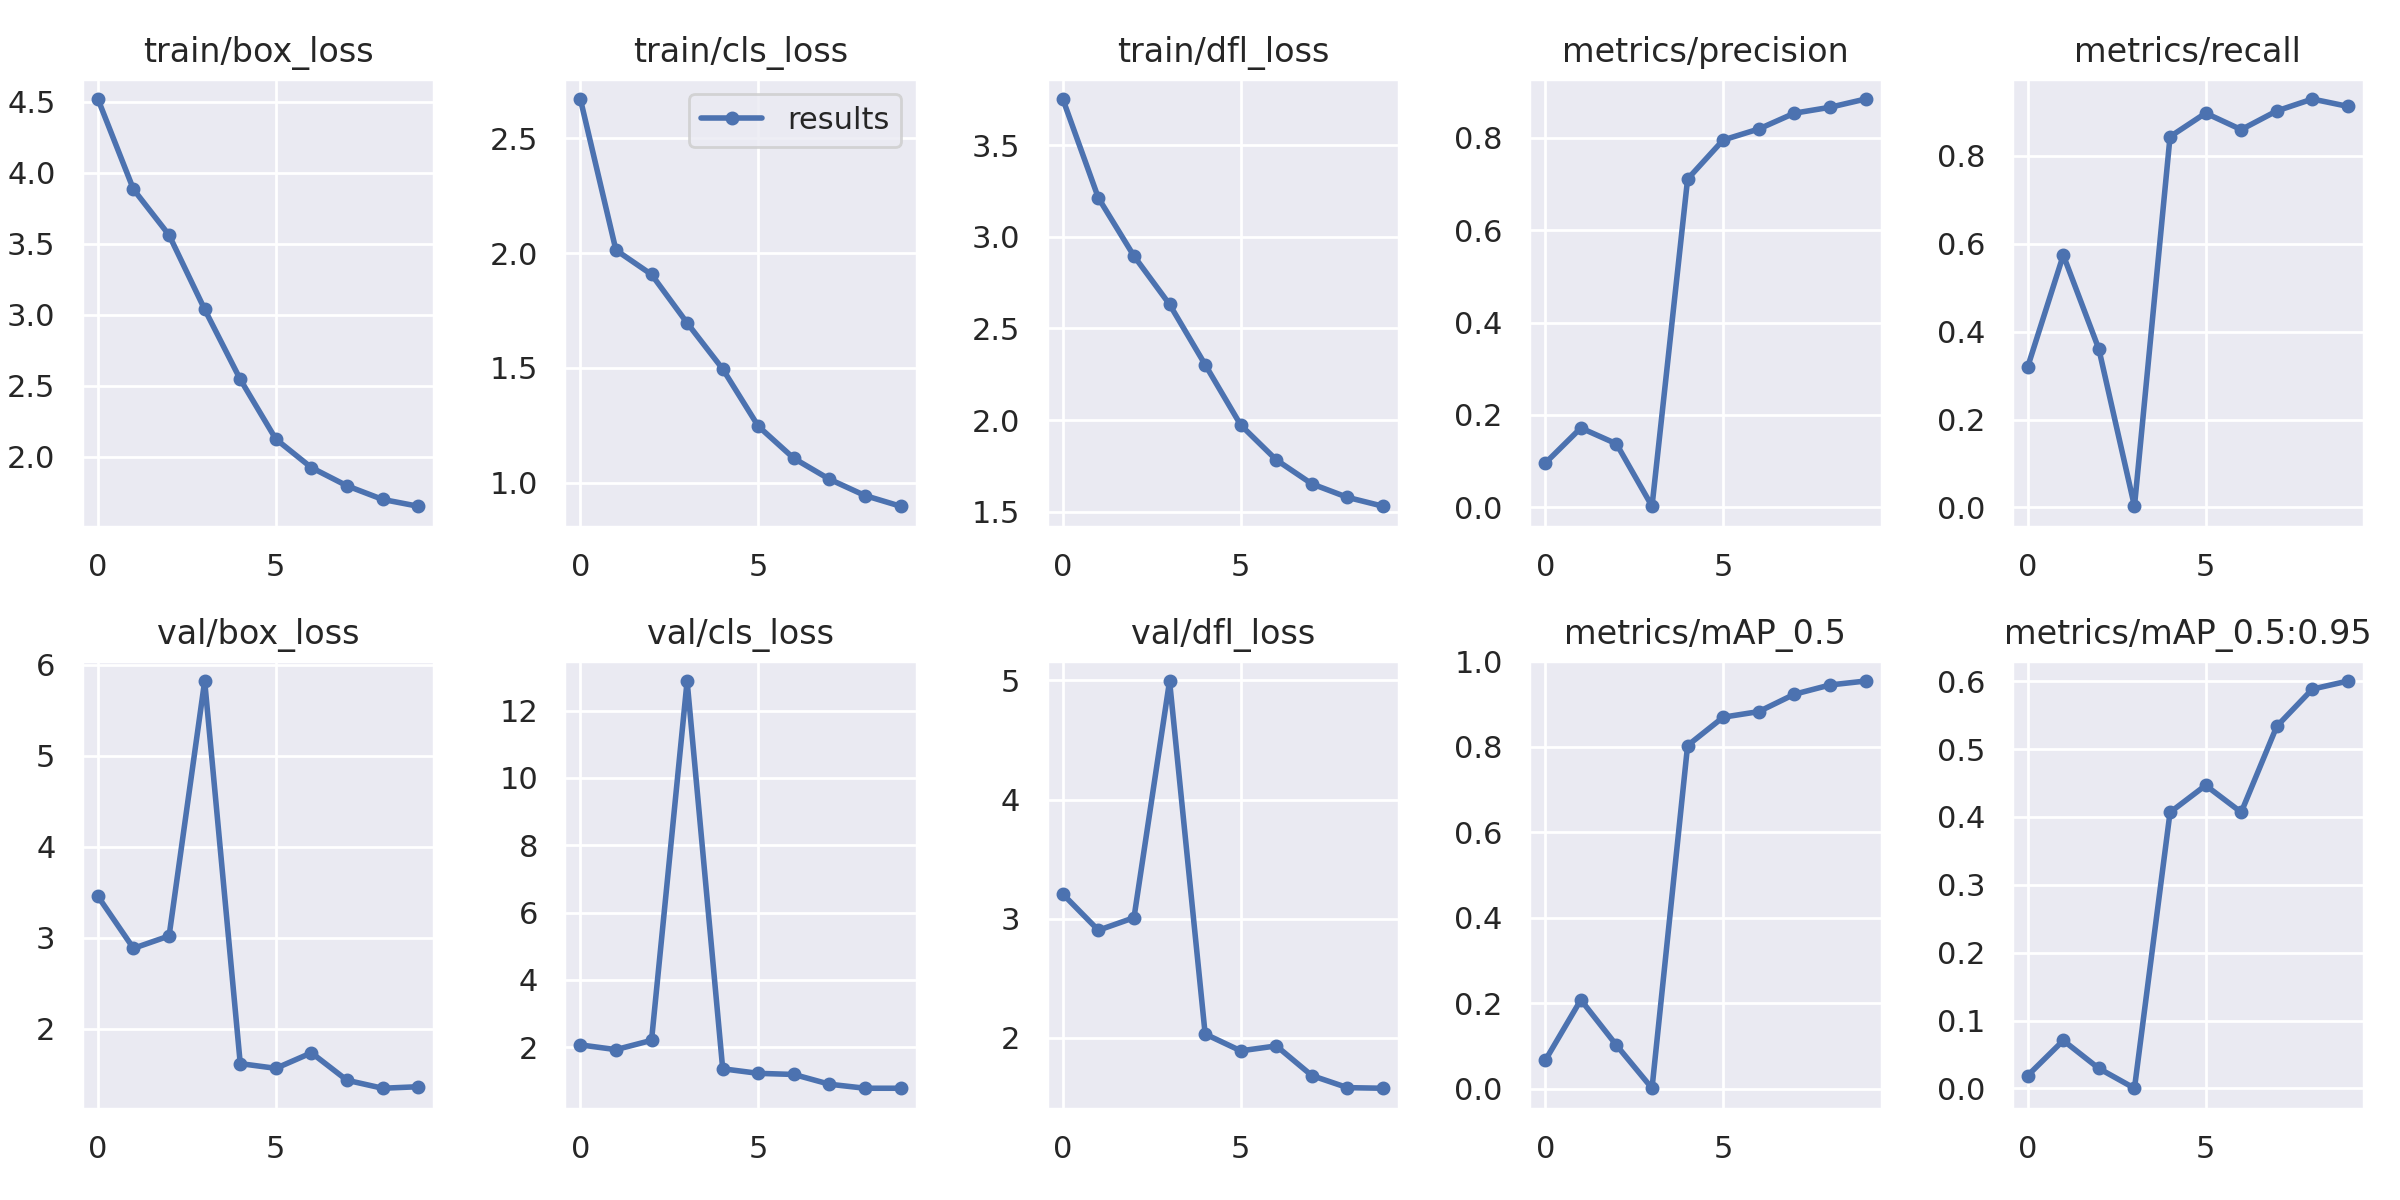

In [ ]:
image_path = '/content/yolov9/runs/train/exp7/results.png'
display(Image(filename=image_path))

#EVALUASI

### GELAN c - mAP : 98.3%

In [ ]:
%cd {HOME}/yolov9

!python val.py \
--img 640 --batch 8 --conf 0.001 --iou 0.7 --device 0 \
--data {dataset.location}/data.yaml \
--weights {HOME}/yolov9/runs/train/exp3/weights/best.pt

/content/yolov9
val: data=/content/yolov9/Palm-Tree-Label-200m-Splitted-5/data.yaml, weights=['/content/yolov9/runs/train/exp3/weights/best.pt'], batch_size=8, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

/content/yolov9/models/experimental.py:75: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. Thi

### GELAN e - mAP : 96%

In [ ]:
%cd {HOME}/yolov9

!python val.py \
--img 640 --batch 8 --conf 0.001 --iou 0.7 --device 0 \
--data {dataset.location}/data.yaml \
--weights {HOME}/yolov9/runs/train/exp4/weights/best.pt

/content/yolov9
val: data=/content/yolov9/Palm-Tree-Label-200m-Splitted-5/data.yaml, weights=['/content/yolov9/runs/train/exp4/weights/best.pt'], batch_size=8, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

/content/yolov9/models/experimental.py:75: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. Thi

### YOLO 9 c - mAP : 95.8%

In [ ]:
%cd {HOME}/yolov9

!python val.py \
--img 640 --batch 8 --conf 0.001 --iou 0.7 --device 0 \
--data {dataset.location}/data.yaml \
--weights {HOME}/yolov9/runs/train/exp6/weights/best.pt

/content/yolov9
val: data=/content/yolov9/Palm-Tree-Label-200m-Splitted-5/data.yaml, weights=['/content/yolov9/runs/train/exp6/weights/best.pt'], batch_size=8, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

/content/yolov9/models/experimental.py:75: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. Thi

### YOLO 9 e - mAP : 95.4%

In [ ]:
%cd {HOME}/yolov9

!python val.py \
--img 640 --batch 8 --conf 0.001 --iou 0.7 --device 0 \
--data {dataset.location}/data.yaml \
--weights {HOME}/yolov9/runs/train/exp7/weights/best.pt

/content/yolov9
val: data=/content/yolov9/Palm-Tree-Label-200m-Splitted-5/data.yaml, weights=['/content/yolov9/runs/train/exp7/weights/best.pt'], batch_size=8, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

/content/yolov9/models/experimental.py:75: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. Thi

# TEST

### GELAN c [219, 1000, 539]

In [ ]:
!python detect.py \
--img 640 --conf 0.1 --device 0 \
--weights {HOME}/yolov9/runs/train/exp3/weights/best.pt \
--source '/content/SAWIT P1.jpg' \
--save-txt

!python detect.py \
--img 640 --conf 0.1 --device 0 \
--weights {HOME}/yolov9/runs/train/exp3/weights/best.pt \
--source '/content/SAWIT P2 cmprs.jpg' \
--save-txt

!python detect.py \
--img 640 --conf 0.1 --device 0 \
--weights {HOME}/yolov9/runs/train/exp3/weights/best.pt \
--source '/content/SAWIT P3 cmprs.jpg' \
--save-txt

detect: weights=['/content/yolov9/runs/train/exp3/weights/best.pt'], source=/content/SAWIT P1.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

/content/yolov9/models/experimental.py:75: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value 

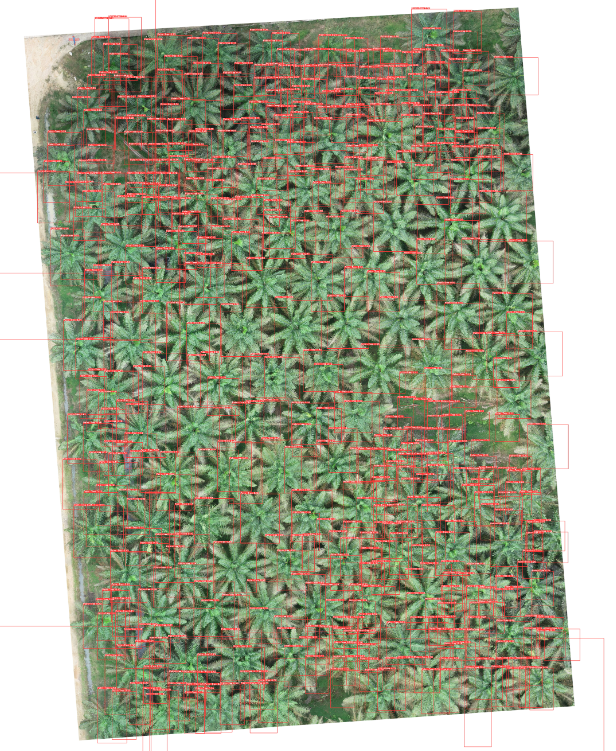

In [ ]:
import os

# Daftar gambar dan folder hasil prediksi
image_names = ['SAWIT P1', 'SAWIT P2 cmprs', 'SAWIT P3 cmprs']
predicted_folders = ['runs/detect/exp5', 'runs/detect/exp6', 'runs/detect/exp7']

# Menghitung jumlah bounding box untuk setiap gambar
for image_name, folder in zip(image_names, predicted_folders):
    # Path ke file label prediksi (.txt)
    prediction_txt_path = f'{folder}/labels/{image_name}.txt'

    # Mengecek apakah file label prediksi ada
    if os.path.exists(prediction_txt_path):
        # Membaca file txt dan menghitung jumlah baris (setiap baris adalah 1 bounding box)
        with open(prediction_txt_path, 'r') as f:
            num_boxes = sum(1 for _ in f)
            print(f"Jumlah bounding box yang terdeteksi di {image_name}: {num_boxes}")
    else:
        print(f"File label tidak ditemukan untuk {image_name}.")

Jumlah bounding box yang terdeteksi di SAWIT P1: 219
Jumlah bounding box yang terdeteksi di SAWIT P2 cmprs: 1000
Jumlah bounding box yang terdeteksi di SAWIT P3 cmprs: 539


### GELAN e [735, 1000, 561]

In [ ]:
!python detect.py \
--img 640 --conf 0.1 --device 0 \
--weights {HOME}/yolov9/runs/train/exp4/weights/best.pt \
--source '/content/SAWIT P1.jpg' \
--save-txt

!python detect.py \
--img 640 --conf 0.1 --device 0 \
--weights {HOME}/yolov9/runs/train/exp4/weights/best.pt \
--source '/content/SAWIT P2 cmprs.jpg' \
--save-txt

!python detect.py \
--img 640 --conf 0.1 --device 0 \
--weights {HOME}/yolov9/runs/train/exp4/weights/best.pt \
--source '/content/SAWIT P3 cmprs.jpg' \
--save-txt

detect: weights=['/content/yolov9/runs/train/exp4/weights/best.pt'], source=/content/SAWIT P1.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

/content/yolov9/models/experimental.py:75: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value 

In [ ]:
import os

# Daftar gambar dan folder hasil prediksi
image_names = ['SAWIT P1', 'SAWIT P2 cmprs', 'SAWIT P3 cmprs']
predicted_folders = ['runs/detect/exp8', 'runs/detect/exp9', 'runs/detect/exp10']

# Menghitung jumlah bounding box untuk setiap gambar
for image_name, folder in zip(image_names, predicted_folders):
    # Path ke file label prediksi (.txt)
    prediction_txt_path = f'{folder}/labels/{image_name}.txt'

    # Mengecek apakah file label prediksi ada
    if os.path.exists(prediction_txt_path):
        # Membaca file txt dan menghitung jumlah baris (setiap baris adalah 1 bounding box)
        with open(prediction_txt_path, 'r') as f:
            num_boxes = sum(1 for _ in f)
            print(f"Jumlah bounding box yang terdeteksi di {image_name}: {num_boxes}")
    else:
        print(f"File label tidak ditemukan untuk {image_name}.")

Jumlah bounding box yang terdeteksi di SAWIT P1: 735
Jumlah bounding box yang terdeteksi di SAWIT P2 cmprs: 1000
Jumlah bounding box yang terdeteksi di SAWIT P3 cmprs: 561


### YOLO 9 c [1000, 1000, 581]

In [ ]:
!python detect.py \
--img 640 --conf 0.1 --device 0 \
--weights {HOME}/yolov9/runs/train/exp6/weights/best.pt \
--source '/content/SAWIT P1.jpg' \
--save-txt

!python detect.py \
--img 640 --conf 0.1 --device 0 \
--weights {HOME}/yolov9/runs/train/exp6/weights/best.pt \
--source '/content/SAWIT P2 cmprs.jpg' \
--save-txt

!python detect.py \
--img 640 --conf 0.1 --device 0 \
--weights {HOME}/yolov9/runs/train/exp6/weights/best.pt \
--source '/content/SAWIT P3 cmprs.jpg' \
--save-txt

detect: weights=['/content/yolov9/runs/train/exp6/weights/best.pt'], source=/content/SAWIT P1.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

/content/yolov9/models/experimental.py:75: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value 

In [ ]:
import os

# Daftar gambar dan folder hasil prediksi
image_names = ['SAWIT P1', 'SAWIT P2 cmprs', 'SAWIT P3 cmprs']
predicted_folders = ['runs/detect/exp14', 'runs/detect/exp15', 'runs/detect/exp16']

# Menghitung jumlah bounding box untuk setiap gambar
for image_name, folder in zip(image_names, predicted_folders):
    # Path ke file label prediksi (.txt)
    prediction_txt_path = f'{folder}/labels/{image_name}.txt'

    # Mengecek apakah file label prediksi ada
    if os.path.exists(prediction_txt_path):
        # Membaca file txt dan menghitung jumlah baris (setiap baris adalah 1 bounding box)
        with open(prediction_txt_path, 'r') as f:
            num_boxes = sum(1 for _ in f)
            print(f"Jumlah bounding box yang terdeteksi di {image_name}: {num_boxes}")
    else:
        print(f"File label tidak ditemukan untuk {image_name}.")

Jumlah bounding box yang terdeteksi di SAWIT P1: 1000
Jumlah bounding box yang terdeteksi di SAWIT P2 cmprs: 1000
Jumlah bounding box yang terdeteksi di SAWIT P3 cmprs: 581


### YOLO 9 e [820, 1000, 711]

In [ ]:
!python detect.py \
--img 640 --conf 0.1 --device 0 \
--weights {HOME}/yolov9/runs/train/exp7/weights/best.pt \
--source '/content/SAWIT P1.jpg' \
--save-txt

!python detect.py \
--img 640 --conf 0.1 --device 0 \
--weights {HOME}/yolov9/runs/train/exp7/weights/best.pt \
--source '/content/SAWIT P2 cmprs.jpg' \
--save-txt

!python detect.py \
--img 640 --conf 0.1 --device 0 \
--weights {HOME}/yolov9/runs/train/exp7/weights/best.pt \
--source '/content/SAWIT P3 cmprs.jpg' \
--save-txt

detect: weights=['/content/yolov9/runs/train/exp7/weights/best.pt'], source=/content/SAWIT P1.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

/content/yolov9/models/experimental.py:75: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value 

In [ ]:
import os

# Daftar gambar dan folder hasil prediksi
image_names = ['SAWIT P1', 'SAWIT P2 cmprs', 'SAWIT P3 cmprs']
predicted_folders = ['runs/detect/exp17', 'runs/detect/exp18', 'runs/detect/exp19']

# Menghitung jumlah bounding box untuk setiap gambar
for image_name, folder in zip(image_names, predicted_folders):
    # Path ke file label prediksi (.txt)
    prediction_txt_path = f'{folder}/labels/{image_name}.txt'

    # Mengecek apakah file label prediksi ada
    if os.path.exists(prediction_txt_path):
        # Membaca file txt dan menghitung jumlah baris (setiap baris adalah 1 bounding box)
        with open(prediction_txt_path, 'r') as f:
            num_boxes = sum(1 for _ in f)
            print(f"Jumlah bounding box yang terdeteksi di {image_name}: {num_boxes}")
    else:
        print(f"File label tidak ditemukan untuk {image_name}.")

Jumlah bounding box yang terdeteksi di SAWIT P1: 820
Jumlah bounding box yang terdeteksi di SAWIT P2 cmprs: 1000
Jumlah bounding box yang terdeteksi di SAWIT P3 cmprs: 711


### CUSTOM TESTING

In [ ]:
!python detect.py \
--img 5000 --conf 0.138 --device 0 \
--weights {HOME}/yolov9/runs/train/exp3/weights/best.pt \
--source '/content/SAWIT P1.jpg' \
--save-txt

detect: weights=['/content/yolov9/runs/train/exp3/weights/best.pt'], source=/content/SAWIT P1.jpg, data=data/coco128.yaml, imgsz=[5000, 5000], conf_thres=0.138, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

/content/yolov9/models/experimental.py:75: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default va

In [ ]:
import os

# Nama gambar dan folder hasil prediksi
image_name = 'SAWIT P1'
predicted_folder = 'runs/detect/exp39'

# Path ke file label prediksi (.txt)
prediction_txt_path = f'{predicted_folder}/labels/{image_name}.txt'

# Mengecek apakah file label prediksi ada
if os.path.exists(prediction_txt_path):
    # Membaca file txt dan menghitung jumlah baris (setiap baris adalah 1 bounding box)
    with open(prediction_txt_path, 'r') as f:
        num_boxes = sum(1 for _ in f)
        print(f"Jumlah bounding box yang terdeteksi di {image_name}: {num_boxes}")
else:
    print(f"File label tidak ditemukan untuk {image_name}.")


Jumlah bounding box yang terdeteksi di SAWIT P1: 227


In [ ]:
!python detect.py \
--img 640 --conf 0.1 --device 0 \
--weights {HOME}/yolov9/runs/train/exp3/weights/best.pt \
--source '/content/SAWIT P1.jpg' \
--save-txt

detect: weights=['/content/yolov9/runs/train/exp3/weights/best.pt'], source=/content/SAWIT P1.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

/content/yolov9/models/experimental.py:75: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value 

In [ ]:
import os

# Nama gambar dan folder hasil prediksi
image_name = 'SAWIT P1'
predicted_folder = 'runs/detect/exp38'

# Path ke file label prediksi (.txt)
prediction_txt_path = f'{predicted_folder}/labels/{image_name}.txt'

# Mengecek apakah file label prediksi ada
if os.path.exists(prediction_txt_path):
    # Membaca file txt dan menghitung jumlah baris (setiap baris adalah 1 bounding box)
    with open(prediction_txt_path, 'r') as f:
        num_boxes = sum(1 for _ in f)
        print(f"Jumlah bounding box yang terdeteksi di {image_name}: {num_boxes}")
else:
    print(f"File label tidak ditemukan untuk {image_name}.")

Jumlah bounding box yang terdeteksi di SAWIT P1: 219
